{'rr': '272', 'area': '32400', 'cc': '495', 'k': '0.268', 'thresh_dist': '0.1986', 'object_id': '0', 'color': 'yellow', 'shape': 'square', 'radius': '90', 'vagueness': 'same', 'prob': '0.984', 'size': 'small', 'rotation': 'N/A', 'box': [584, 262, 846, 524]}
{'rr': '482', 'area': '25433', 'cc': '825', 'k': '0.268', 'thresh_dist': '0.3276', 'object_id': '1', 'color': 'yellow', 'shape': 'circle', 'radius': '90', 'vagueness': 'same', 'prob': '0.9998', 'size': 'small', 'rotation': 'N/A', 'box': [1060, 565, 1322, 827]}
{'rr': '941', 'area': '3600', 'cc': '567', 'k': '0.268', 'thresh_dist': '0.732', 'object_id': '2', 'color': 'green', 'shape': 'square', 'radius': '30', 'vagueness': 'same', 'prob': '1.0', 'size': 'small', 'rotation': 'N/A', 'box': [774, 1314, 864, 1404]}
{'rr': '137', 'area': '7825', 'cc': '204', 'k': '0.268', 'thresh_dist': '0.6537', 'object_id': '3', 'color': 'blue', 'shape': 'circle', 'radius': '50', 'vagueness': 'same', 'prob': '1.0', 'size': 'small', 'rotation': 'N/A', 'b

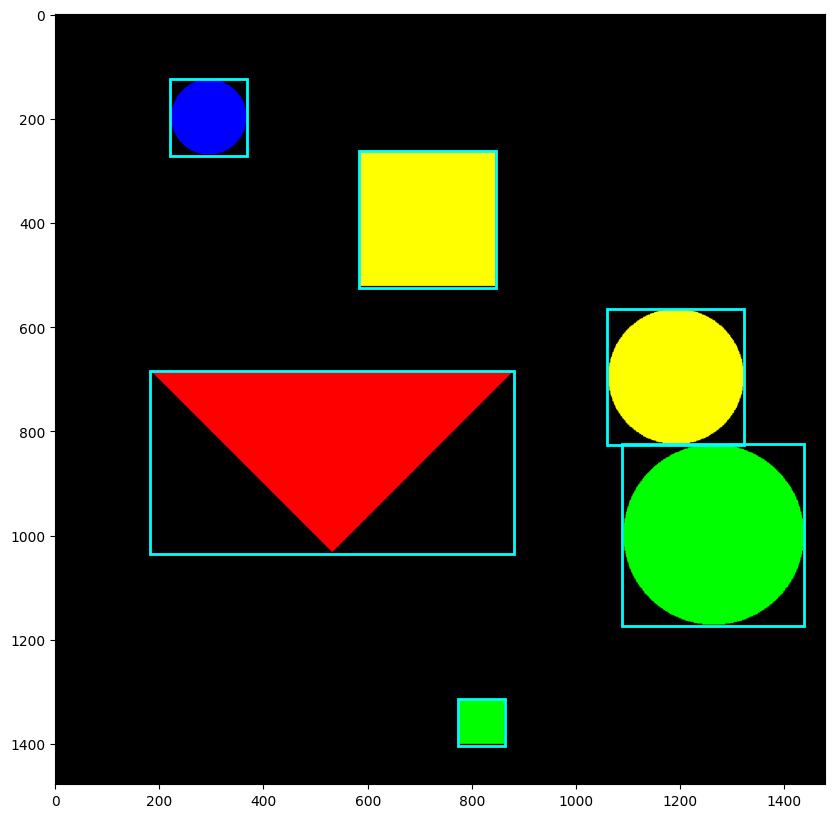

In [1]:
import sys
sys.path.append("../code/")
import bounding_boxes

img_name = "11.png"
bounding_boxes.make_img_boxes(img_name, dataset="pos", split="train", to_save=False)

../data/pos/images/train/19.png
(1478, 1478)


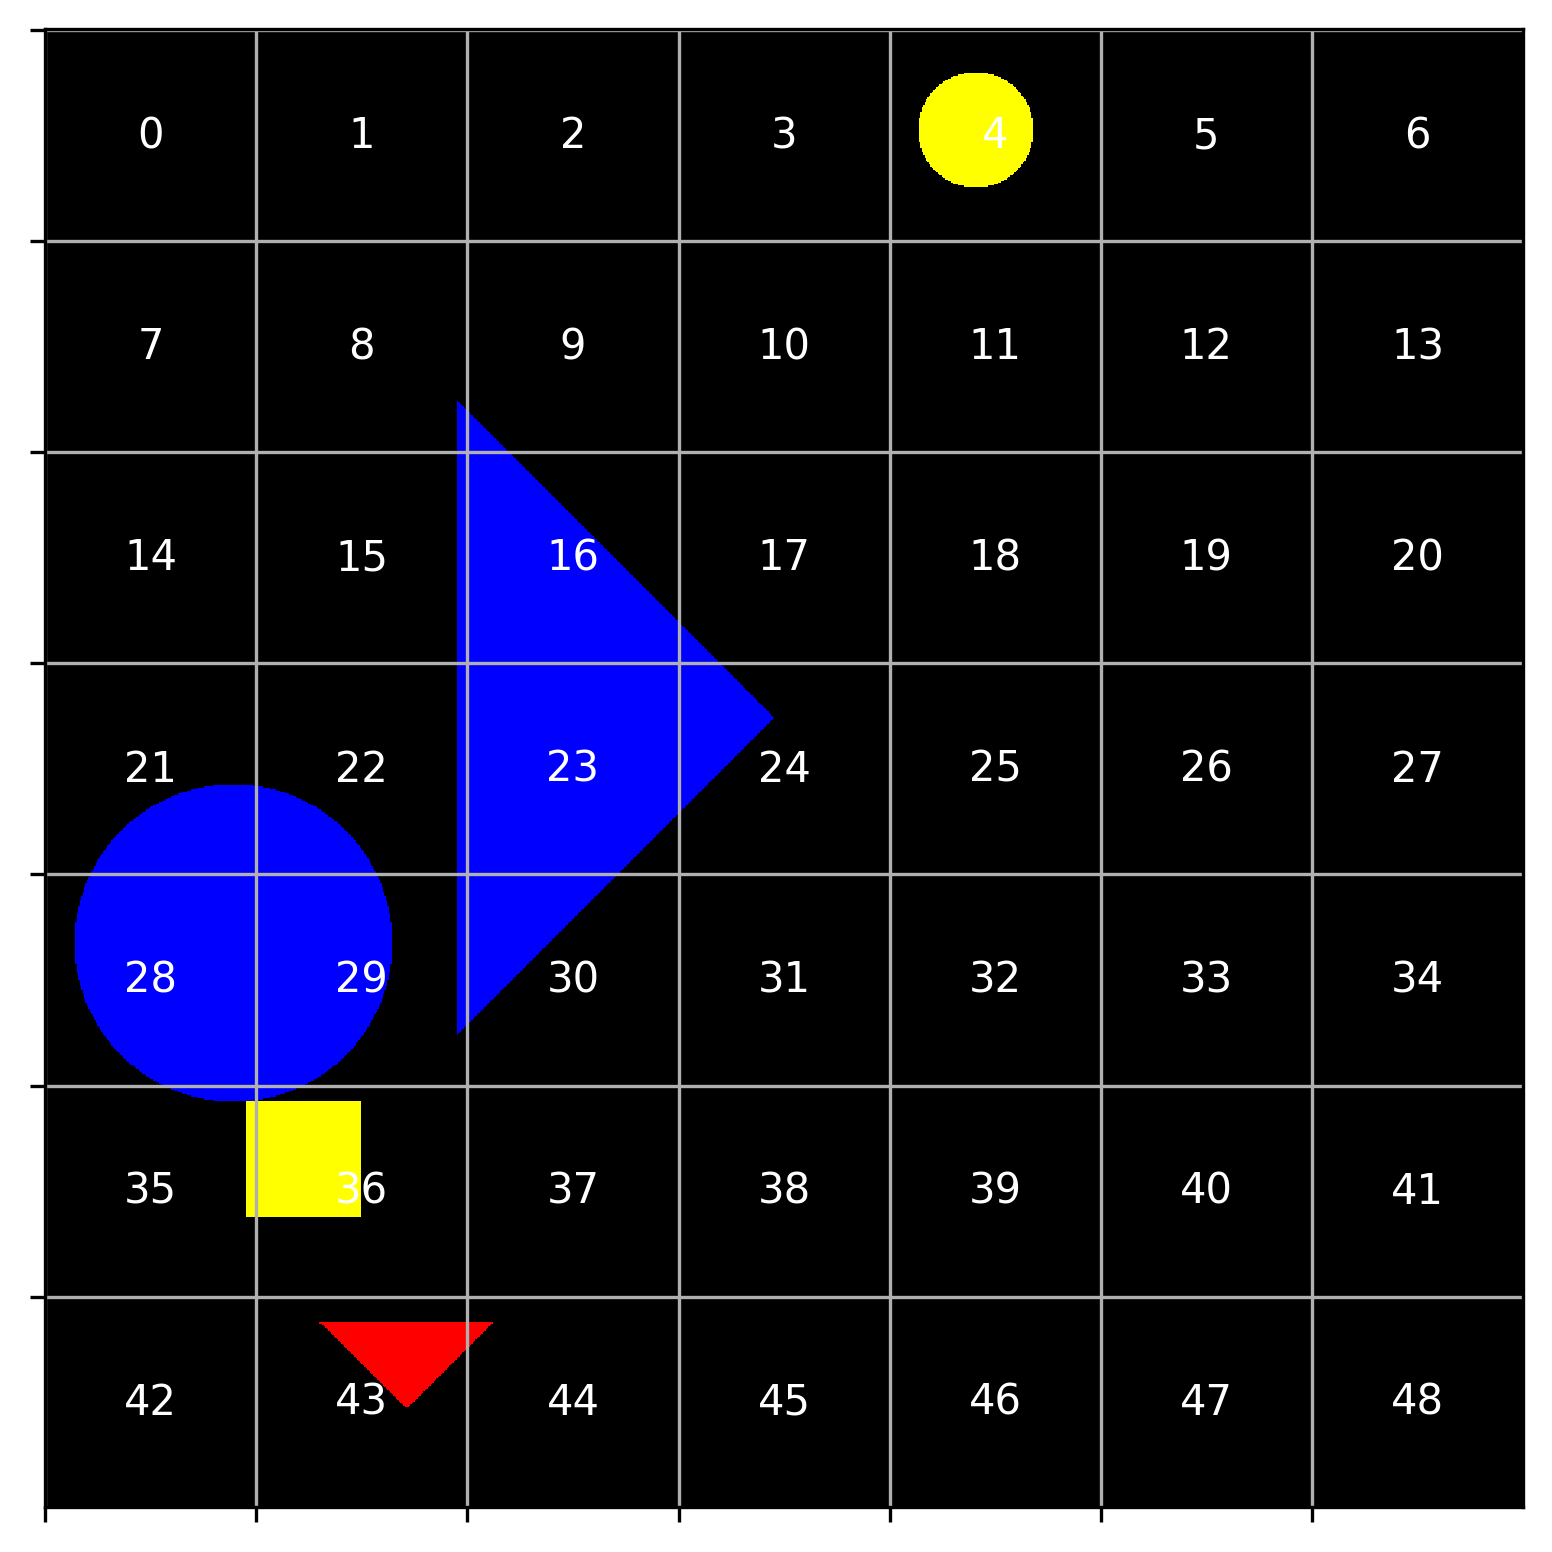

In [2]:
from transformer_patches import open_image_withpatches
open_image_withpatches("19.png", "pos", "train", to_save=False)

In [3]:
def convert_coordinate(p, resolution=1500):
    return ceil(ceil(float(p)) / 1024 * resolution)

In [23]:
def get_box(obj, resolution):

    rr = convert_coordinate(obj["rr"], resolution)
    cc = convert_coordinate(obj["cc"], resolution)    
    r = convert_coordinate(obj["radius"], resolution)
    box = []

    if obj["shape"] == "circle" or obj["shape"] == "square":
        # tl = [cc - r - 1, rr - r - 1]
        tl = [cc - r, rr - r]
        br = [cc + r, rr + r]
        # br = [cc + r + 1, rr + r + 1]
        box.extend(tl)
        box.extend(br)
        return box

    if obj["shape"] == "rectangle":
        if obj["rotation"] == "vert":
            tl = [cc - ceil(r / 2), rr - 2 * r]
            # tl = [cc - ceil(r / 2) - 1, rr - 2 * r - 1]
            # br = [cc + ceil(r / 2) + 1, rr + 2 * r + 1]
            br = [cc + ceil(r / 2), rr + 2 * r]
            box.extend(tl)
            box.extend(br)
            return box
        if obj["rotation"] == "horiz":
            # tl = [cc - 2 * r - 1, rr - ceil(r / 2) - 1]
            tl = [cc - 2 * r, rr - ceil(r / 2)]
            # br = [cc + 2 * r + 1, rr + ceil(r / 2) + 1]
            br = [cc + 2 * r, rr + ceil(r / 2)]
            box.extend(tl)
            box.extend(br)
            return box

    if obj["shape"] == "triangle":
        if obj["rotation"] == "vert":
            # tl = [cc - 2 * r - 1, rr - 2 * r - 1]
            tl = [cc - 2 * r, rr - 2 * r]
            # br = [cc + 1, rr + 2 * r + 1]
            bl = [cc - 2 * r, rr + 2 * r]
            # bl = [cc - 2 * r - 1, rr + 2 * r + 1]
            rm = [cc, rr]
            box.extend(tl)
            # box.extend(br)
            box.extend(bl)
            box.extend(rm)
            return box
        if obj["rotation"] == "horiz":
            tl = [cc - 2 * r, rr - 2 * r]
            # tl = [cc - 2 * r - 1, rr - 2 * r - 1]
            # br = [cc + 2 * r + 1, rr + 1]
            # tr = [cc + 2 * r + 1, rr - 2 * r - 1]
            tr = [cc + 2 * r, rr - 2 * r]
            bm = [cc, rr]
            box.extend(tl)
            # box.extend(br)
            box.extend(tr)
            box.extend(bm)
            return box

In [41]:
import matplotlib.pyplot as plt

def bbox_to_rect(bbox, color):
    """Convert bounding box to matplotlib format."""
    # Convert the bounding box (top-left x, top-left y, bottom-right x,
    # bottom-right y) format to matplotlib format: ((upper-left x,
    # upper-left y), width, height)
    if bbox["shape"] != "triangle":
        bbox = bbox["box"]
        return plt.Rectangle(
            xy=(bbox[0], bbox[1]),
            width=bbox[2] - bbox[0],
            height=bbox[3] - bbox[1],
            fill=False,
            edgecolor=color,
            linewidth=2,
        )
    else:
        bbox = bbox["box"]
        xy1 = (bbox[0], bbox[1])
        xy2 = (bbox[2], bbox[3])
        xy3 = (bbox[4], bbox[5])
        return plt.Polygon(
            xy=(xy1, xy2, xy3),
            closed=True,
            fill = False,
            edgecolor = color,
            linewidth = 2,
        )

In [42]:
def make_img_boxes(img_filename, dataset="sup1", split="train", to_save=False):
    img_path = f"../data/{dataset}/images/{split}/{img_filename}"
    # img_path = f"../examples/{dataset}/30patchimages/{img_filename}"
    boxes = get_boxes(img_filename, dataset, split)

    plt.rcParams["figure.figsize"] = (10, 10)
    fig, ax = plt.subplots()
    img = np.array(Image.open(img_path))
    plt.imshow(img)

    for bbox in boxes:
        print(bbox)
        ax.add_patch(bbox_to_rect(bbox, "cyan"))

    if to_save:
        plt.axis("off")
        plt.savefig(
            f"../examples/{dataset}/bb_{img_filename}",
            # f"../examples/{dataset}/30patchimages/bb_{img_filename}",
            bbox_inches="tight",
            pad_inches=0,
        )
    else:
        plt.show()

In [39]:
import utils
from PIL import Image
from math import ceil
import numpy as np

def get_boxes(img_filename, dataset="sup1", split="train"):
    img_path = f"../data/{dataset}/images/{split}/{img_filename}"
    annotation = utils.get_annotation(dataset=dataset, split=split)
    img = Image.open(img_path)
    img_size = img.size
    assert img_size[0] == img_size[1], "width should equal height"
    img = img.load()

    objects = annotation[img_filename.split(".")[0]][1]["objects"]
    for obj in objects:
        obj["rotation"] = bounding_boxes.get_rotation(obj, img, resolution=img_size[0])
    for obj in objects:
        obj["box"] = get_box(obj, resolution=img_size[0])

    boxes = []
    for obj in objects:
        boxes.append(obj)

    return boxes

{'rr': '272', 'area': '32400', 'cc': '495', 'k': '0.268', 'thresh_dist': '0.1986', 'object_id': '0', 'color': 'yellow', 'shape': 'square', 'radius': '90', 'vagueness': 'same', 'prob': '0.984', 'size': 'small', 'rotation': 'N/A', 'box': [585, 263, 845, 523]}
{'rr': '482', 'area': '25433', 'cc': '825', 'k': '0.268', 'thresh_dist': '0.3276', 'object_id': '1', 'color': 'yellow', 'shape': 'circle', 'radius': '90', 'vagueness': 'same', 'prob': '0.9998', 'size': 'small', 'rotation': 'N/A', 'box': [1061, 566, 1321, 826]}
{'rr': '941', 'area': '3600', 'cc': '567', 'k': '0.268', 'thresh_dist': '0.732', 'object_id': '2', 'color': 'green', 'shape': 'square', 'radius': '30', 'vagueness': 'same', 'prob': '1.0', 'size': 'small', 'rotation': 'N/A', 'box': [775, 1315, 863, 1403]}
{'rr': '137', 'area': '7825', 'cc': '204', 'k': '0.268', 'thresh_dist': '0.6537', 'object_id': '3', 'color': 'blue', 'shape': 'circle', 'radius': '50', 'vagueness': 'same', 'prob': '1.0', 'size': 'small', 'rotation': 'N/A', 'b

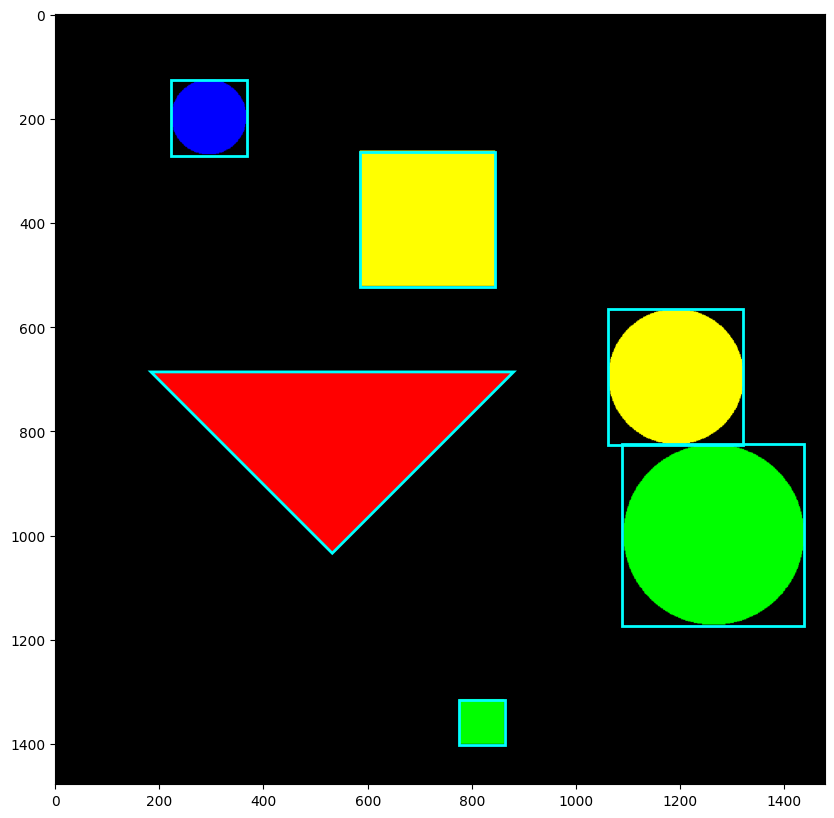

In [43]:
make_img_boxes(img_name, dataset="pos", split="train", to_save=False)

{'rr': '70', 'area': '5013', 'cc': '644', 'k': '0.099', 'thresh_dist': '0.8695', 'object_id': '0', 'color': 'yellow', 'shape': 'circle', 'radius': '40', 'vagueness': 'same', 'prob': '1.0', 'size': 'small', 'rotation': 'N/A', 'box': [872, 44, 988, 160]}
{'rr': '477', 'area': '48400', 'cc': '505', 'k': '0.099', 'thresh_dist': '0.099', 'object_id': '1', 'color': 'blue', 'shape': 'triangle', 'radius': '110', 'vagueness': 'same', 'prob': '0.8125', 'size': 'big', 'rotation': 'vert', 'box': [411, 371, 411, 1007, 729, 689]}
{'rr': '956', 'area': '3600', 'cc': '250', 'k': '0.099', 'thresh_dist': '0.901', 'object_id': '2', 'color': 'red', 'shape': 'triangle', 'radius': '30', 'vagueness': 'same', 'prob': '1.0', 'size': 'small', 'rotation': 'horiz', 'box': [273, 1292, 449, 1292, 361, 1380]}
{'rr': '783', 'area': '6400', 'cc': '179', 'k': '0.099', 'thresh_dist': '0.8385', 'object_id': '3', 'color': 'yellow', 'shape': 'square', 'radius': '40', 'vagueness': 'same', 'prob': '1.0', 'size': 'small', 'ro

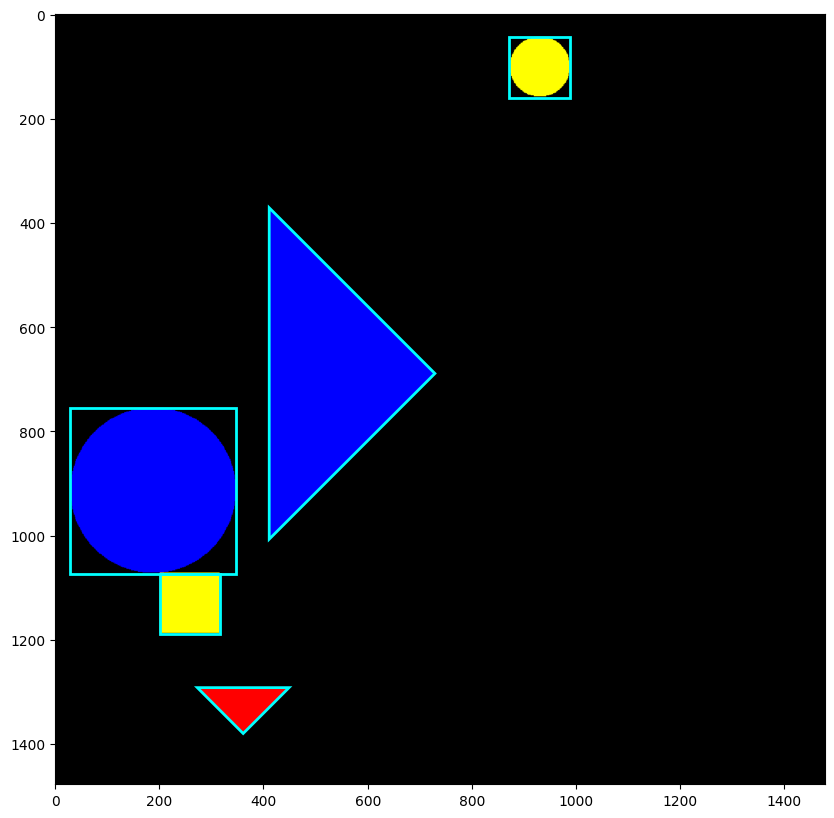

In [28]:
make_img_boxes("19.png", dataset="pos", split="train", to_save=False)

So, with these changes the bounding boxes of triangles are triangles. Now, rewrite the transformer_patches code to work with triangle boxes too. 

In [30]:
from collections import defaultdict

def get_all_patches_with_objects(img_filename, dataset, split):
    """New version: returns dictionary of patch numbers with box"""
    img_path = f"../data/{dataset}/images/{split}/{img_filename}"
    boxes = get_boxes(img_filename, dataset, split)

    img = Image.open(img_path)
    height, width = img.size
    step = int(height / 7)

    patches = defaultdict(lambda: [])
    for j, y in enumerate(range(0, step * 7, step)):
        for i, x in enumerate(range(0, step * 7, step)):
            number = i + j * 7
            patch = (x, y, x + int(width / 7), y + int(height / 7))
            for box in boxes:
                if box["shape"] == "triangle":
                    if check_box_in_patch(patch, box, number):
                        patches[number].append(box)
    return patches

In [35]:
def check_box_in_patch(patch, box):
    """
    patch: format (top-left x, top-left y, bottom-right x, bottom-right y) e.g. [608, 969, 902, 1117]
    box (dict): box["box"] has as format (top-left x, top-left y, bottom-right x, bottom-right y) e.g. [608, 969, 902, 1117]
    """
    tlx_patch, tly_patch, brx_patch, bry_patch = patch
    if box["shape"] != "triangle":
        tlx, tly, brx, bry = box["box"]
        if tlx >= brx_patch or brx <= tlx_patch or tly_patch >= bry or bry_patch <= tly:
            return False
        else:
            return True
    else: # the box is a triangle
        blx_patch = tlx_patch
        bly_patch = bry_patch
        trx_patch = brx_patch
        try_patch = tly_patch
        if box["rotation"] == "vert":
            tlx, tly, blx, bly, rmx, rmy = box["box"]
            if brx_patch <= tlx or bry_patch <= tly or tlx_patch >= rmx or tly_patch >= bly:
                return False
            else:
                if tlx_patch >= blx and tlx_patch <= rmx: 
                    if tly_patch >= bly + ((rmy - bly) / (rmx - blx)) * (tlx_patch - blx):  # check lower edge triangle
                        return False
                elif trx_patch >= blx and trx_patch <= rmx:
                    if try_patch >= bly + ((rmy - bly) / (rmx - blx) * (trx_patch - blx)):  # check lower edge triangle
                        if bly <= try_patch:
                            return False
                if blx_patch >= tlx and blx_patch <= rmx:
                    if bly_patch <= tly + ((rmy - tly) / (rmx - tlx)) * (blx_patch - tlx):  # check upper edge triangle
                        return False
                elif brx_patch >= tlx and brx_patch <= rmx:
                    if bry_patch <= tly + ((rmy - tly) / (rmx - tlx)) * (brx_patch - tlx):  # check upper edge triangle
                        if tly >= bry_patch:
                            return False
            return True
        elif box["rotation"] == "horiz":
            tlx, tly, trx, triy, bmx, bmy = box["box"]
            if tlx >= brx_patch or tly >= bry_patch or trx <= tlx_patch or bmy <= tly_patch:
                return False
            else:
                if trx_patch >= tlx and trx_patch <= bmx:
                    if try_patch >= tly + ((bmy - tly) / (bmx - tlx)) * (trx_patch - tlx):  # check left edge triangle
                        return False
                if tlx_patch >= bmx and tlx_patch <= trx:
                    if tly_patch >= bmy + ((triy - bmy)/ (trx - bmx)) * (tlx_patch - bmx):  # check right edge triangle
                        return False
            return True

../data/pos/images/train/15904.png
(1478, 1478)
patch 45:  (633, 1266, 844, 1477)
patch 45:  (633, 1266, 844, 1477)
patch 45:  (633, 1266, 844, 1477)


dict_keys([10, 11, 16, 17, 18, 19, 20, 24, 25, 26, 30, 37, 38, 44, 45])

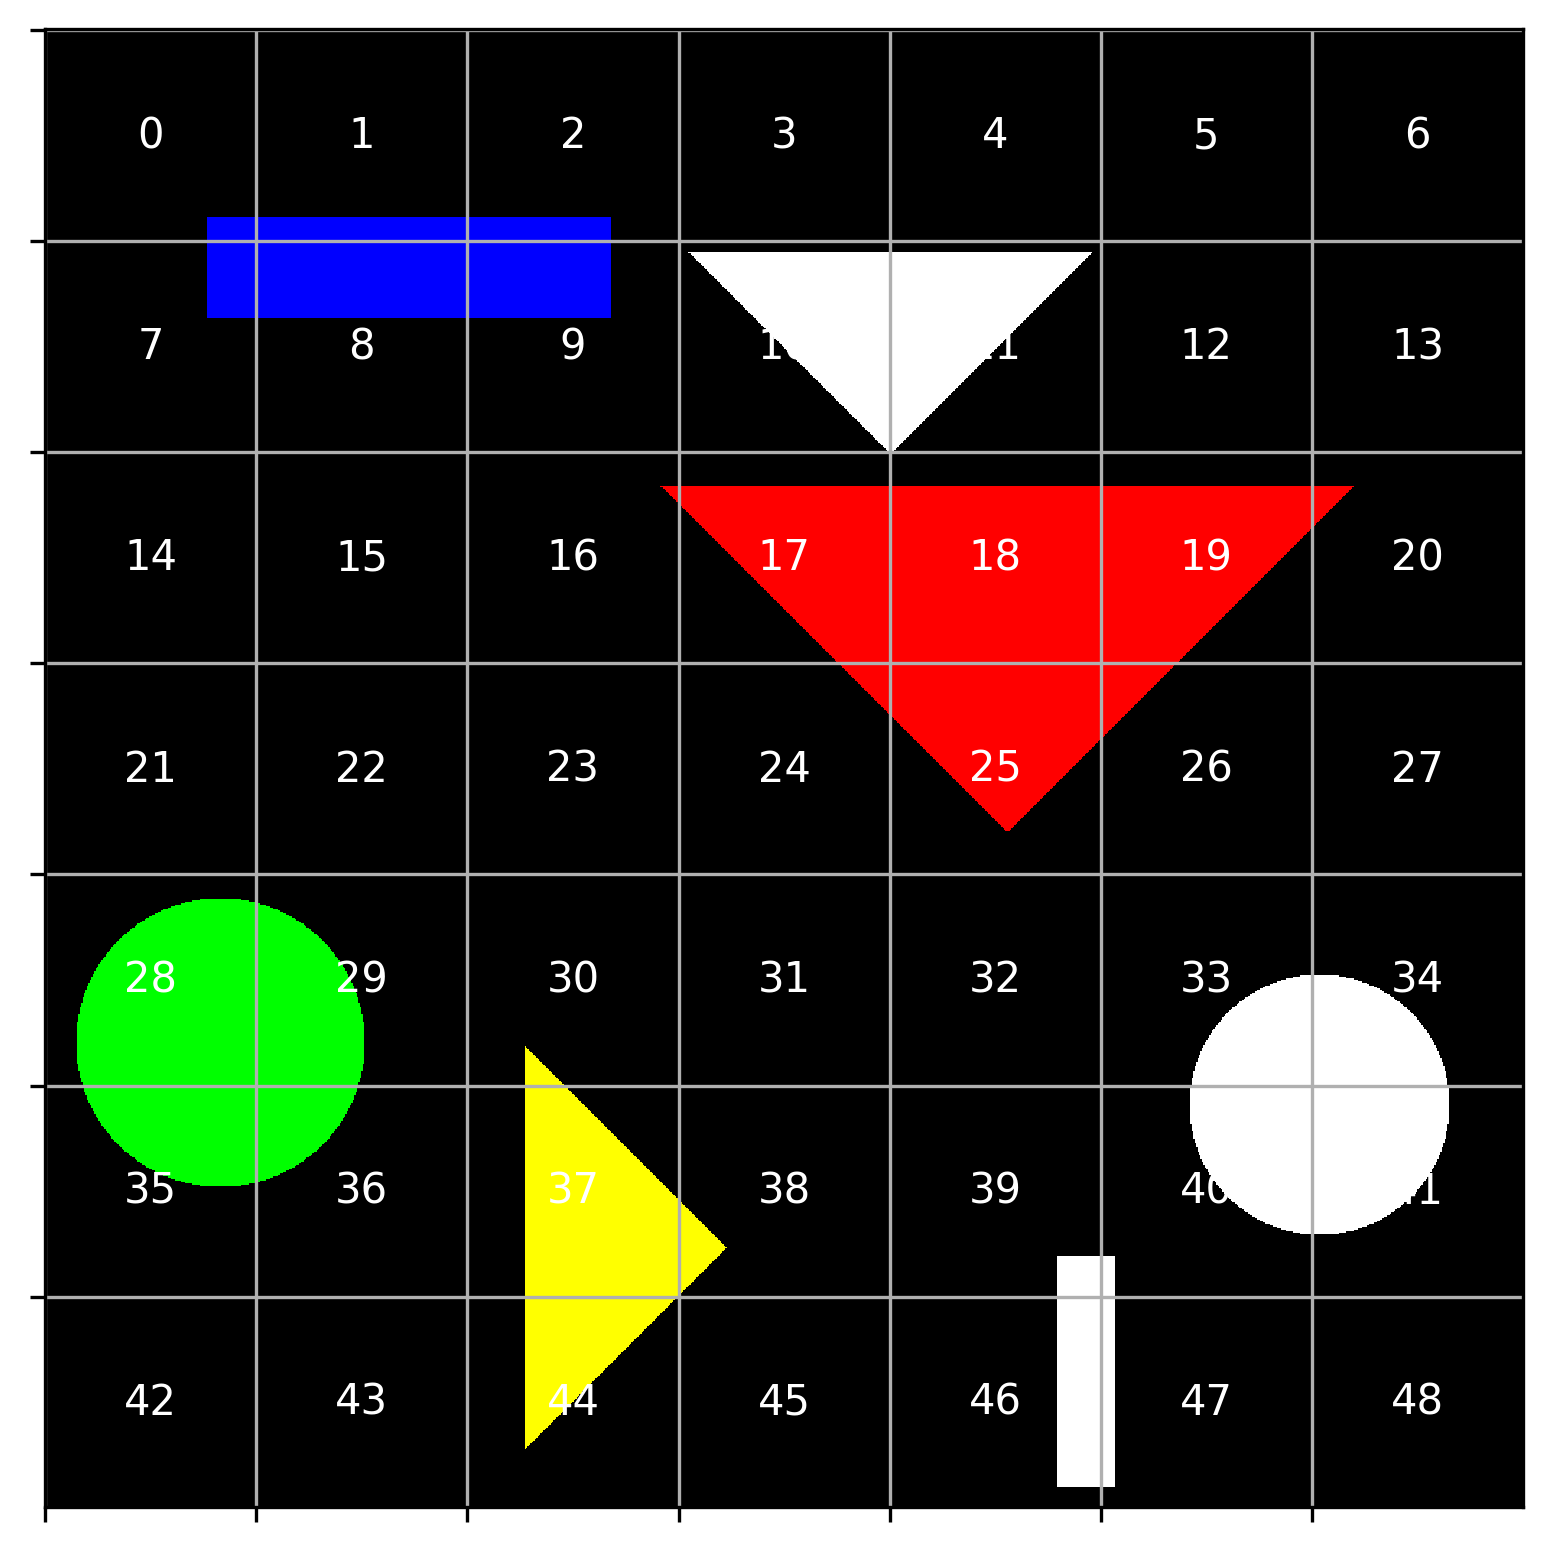

In [36]:
img_id = 15904
open_image_withpatches(f"{img_id}.png", "pos", "train", to_save=False)
patches = get_all_patches_with_objects(f"{img_id}.png", "pos", "train")
patches.keys()

In [34]:
patches[45]

[{'rr': '844',
  'area': '19600',
  'cc': '472',
  'k': '0.204',
  'thresh_dist': '0.5382',
  'object_id': '6',
  'color': 'yellow',
  'shape': 'triangle',
  'radius': '70',
  'vagueness': 'same',
  'prob': '1.0',
  'size': 'small',
  'rotation': 'vert',
  'box': [478, 1015, 478, 1423, 682, 1219]}]